### Plot total vertically integrated heat transport crossing contour

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr
import numpy as np
from dask.distributed import Client
import cmocean as cm


In [2]:
client = Client(n_workers=4)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 28,Total memory: 112.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37505,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 112.00 GiB
Comm: tcp://127.0.0.1:45333,Total threads: 7
Dashboard: /proxy/38459/status,Memory: 28.00 GiB
Nanny: tcp://127.0.0.1:42457,


### Make database

In [3]:
# database for control simulation:
master_session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
control = '01deg_jra55v13_ryf9091'

# salterature of meltwater at the freezing point calculated with the in situ salinity:
Tf_insituS = 'accessom2-GPC004'
# temperature of meltwater at the freezing point calculated with the 0 salinity:
Tf_zeroS = 'accessom2-GPC005'
# temperature of meltwater equal to the minimum of the above two temperatures:
Tf_min = 'accessom2-GPC006'
Tf_min_bg03 = 'accessom2-GPC007' # Idem as GPC008 but vert dist as in BG03 (2 years)
# temperature of meltwater equal to  min( Tfreezing(s=0),Tinsitu)
Tf_min_s0 = 'accessom2-GPC008'


In [4]:
# build database for basal melt experiments:
session_name = '/g/data/x77/cy8964/databases/basal_melt_MOM5.db'
basal_melt_session = cc.database.create_session(session_name)

# dir_list = ['/g/data/e14/pc5520/access-om2/archive/01deg_jra55v13_ryf9091_rerun_for_easterlies/accessom2-GPC004/',
#            '/g/data/e14/pc5520/access-om2/archive/01deg_jra55v13_ryf9091_rerun_for_easterlies/accessom2-GPC005/',
#            '/g/data/e14/pc5520/access-om2/archive/01deg_jra55v13_ryf9091_rerun_for_easterlies/accessom2-GPC006/',
#            '/g/data/e14/pc5520/access-om2/archive/01deg_jra55v13_ryf9091_rerun_for_easterlies/accessom2-GPC007/',
#            '/g/data/e14/pc5520/access-om2/archive/01deg_jra55v13_ryf9091_rerun_for_easterlies/accessom2-GPC008/',
#            '/g/data/e14/pc5520/access-om2/archive/01deg_jra55v13_ryf9091_rerun_for_easterlies/accessom2-GPC013/'
#            ]
# cc.database.build_index(dir_list,basal_melt_session)


In [54]:
vars_025deg = cc.querying.get_variables(basal_melt_session, experiment='accessom2-GPC013')
vars_025deg[vars_025deg['name'].str.lower().str.contains('temp')]

,name,long_name,units,frequency,ncfile,cell_methods,# ncfiles,time_start,time_end
1,TEMP,None,None,None,restart1021/ice/monthly_sstsss.nc,None,30,None,None
47,pot_temp,pot_temp,none,None,restart1024/ocean/ocean_pot_temp.res.nc,None,27,None,None
102,temp,temp,none,None,restart1020/ocean/ocean_temp_salt.res.nc,None,27,None,None
169,surface_temp,Conservative temperature,K,1 daily,output1025/ocean/ocean_daily.nc,time: mean,30,2150-01-01 00:00:00,2155-01-01 00:00:00
172,temp,Conservative temperature,K,1 daily,output1025/ocean/rregionocean_daily_3d_temp.nc,time: mean,30,2150-01-01 00:00:00,2155-01-01 00:00:00
173,temp_xflux_adv,cp*rho*dzt*dyt*u*temp,Watts,1 daily,output1025/ocean/rregionocean_daily_3d_temp_xf...,time: mean,30,2150-01-01 00:00:00,2155-01-01 00:00:00
174,temp_yflux_adv,cp*rho*dzt*dxt*v*temp,Watts,1 daily,output1025/ocean/rregionocean_daily_3d_temp_yf...,time: mean,30,2150-01-01 00:00:00,2155-01-01 00:00:00
258,pot_temp,Potential temperature,K,1 monthly,output1025/ocean/ocean.nc,time: mean,30,2150-01-01 00:00:00,2155-01-01 00:00:00
290,surface_temp,Conservative temperature,K,1 monthly,output1025/ocean/ocean_month.nc,time: mean,30,2150-01-01 00:00:00,2155-01-01 00:00:00
297,temp,Conservative temperature,K,1 monthly,output1025/ocean/ocean.nc,time: mean,30,2150-01-01 00:00:00,2155-01-01 00:00:00


2022-10-26 13:10:36,601 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-10-26 13:10:36,638 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-10-26 13:10:36,667 - distributed.nanny - ERROR - Worker process died unexpectedly
2022-10-26 13:10:36,821 - distributed.nanny - WARNING - Restarting worker
2022-10-26 13:10:36,924 - distributed.nanny - WARNING - Restarting worker
2022-10-26 13:10:36,930 - distributed.nanny - WARNING - Restarting worker
2022-10-26 13:10:36,981 - distributed.nanny - WARNING - Restarting worker
2022-10-26 13:10:37,103 - distributed.nanny - WARNING - Restarting worker
2022-10-26 13:10:37,413 - distributed.nanny - WARNING - Restarting worker
2022-10-26 13:10:37,416 - distributed.nanny - WARNING - Restarting worker
2022-10-26 13:10:37,458 - distributed.nanny - WARNING - Restarting worker
2022-10-26 13:10:37,467 - distributed.nanny - WARNING - Restarting worker
2022-10-26 13:10:38,446 - distributed.nanny - WARNING - Restarting worker

### First plot contour

In [7]:
### Load Adele's isobath contour
isobath_depth = 1000
outfile = '/g/data/v45/akm157/model_data/access-om2/Antarctic_slope_contour_'+str(isobath_depth)+'m.npz'
data = np.load(outfile)
mask_y_transport = data['mask_y_transport']
mask_x_transport = data['mask_x_transport']

In [8]:
lat_range = slice(-90,-59)

Text(0.5, 1.0, '1000m isobath contour')

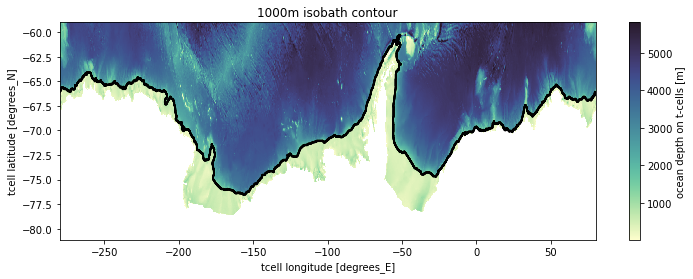

In [9]:
ht = cc.querying.getvar(control, 'ht',master_session, n=1, ncfile = 'ocean_grid.nc')
ht = ht.sel(yt_ocean=lat_range)
yt_ocean = cc.querying.getvar(control, 'yt_ocean',master_session, n=1, ncfile = 'ocean_grid.nc')
xt_ocean = cc.querying.getvar(control, 'xt_ocean',master_session, n=1, ncfile = 'ocean_grid.nc')
yt_ocean = yt_ocean.sel(yt_ocean=lat_range)


fig, axes = plt.subplots(figsize = (12,4))
ht.plot(ax = axes, cmap = cm.cm.deep)
axes.contour(xt_ocean.values, yt_ocean.values,np.abs(mask_x_transport)+np.abs(mask_y_transport),colors = 'k')
axes.set_title('1000m isobath contour')
#plt.savefig('contour.png', dpi = 300)

### Load heat transport for perturbation experiment from cosima cookbook

In order to avoid negative temperatures being interpreted as southward transport, we compare transport to a reference temperature -5$^\circ$C.

$$ \overline{C_p\rho_0(T-T_0)v dx dz } = \overline{\text{temp_yflux_adv}} - C_p\rho_0T_0\overline{v dx dz}  = \overline{\text{temp_yflux_adv}} - C_pT_0\overline{\text{ty_trans}}$$

In [32]:
cp = 3992.10322329649 ##found it on an access-om2 github issue https://github.com/COSIMA/access-om2/issues/121
T_0 = -5

In [33]:
start_time = '2150-01-01'
end_time = '2154-12-31'
time_slice = slice(start_time, end_time)

In [34]:
expt = 'accessom2-GPC013'
session = basal_melt_session

# Load advective heat fluxes of correct time, location, and vertically integrate
temp_xflux_adv = cc.querying.getvar(expt, 'temp_xflux_adv',session, ncfile = 'ocean.nc', frequency = '1 monthly', start_time = start_time , end_time = end_time)
temp_xflux_adv = temp_xflux_adv.sel(time = time_slice, yt_ocean = lat_range).sum('st_ocean')
temp_yflux_adv = cc.querying.getvar(expt, 'temp_yflux_adv',session, ncfile = 'ocean.nc', frequency = '1 monthly',start_time = start_time, end_time = end_time)
temp_yflux_adv = temp_yflux_adv.sel(time = time_slice, yu_ocean = lat_range).sum('st_ocean')

# Load mass transports of correct time, location, and vertically integrate
tx_trans = cc.querying.getvar(expt, 'tx_trans',session, ncfile = 'ocean.nc', frequency = '1 monthly', start_time = start_time , end_time = end_time)
tx_trans = tx_trans.sel(time = time_slice, yt_ocean = lat_range).sum('st_ocean')
ty_trans = cc.querying.getvar(expt, 'ty_trans',session, ncfile = 'ocean.nc', frequency = '1 monthly', start_time = start_time , end_time = end_time)
ty_trans = ty_trans.sel(time = time_slice, yu_ocean = lat_range).sum('st_ocean')



In [35]:
## reassign and rename to incorporate reference temperature
temp_yflux_adv= temp_yflux_adv - T_0*cp*ty_trans
temp_xflux_adv= temp_xflux_adv - T_0*cp*tx_trans


temp_yflux_adv = temp_yflux_adv.rename({'yu_ocean':'y_ocean', 'xt_ocean':'x_ocean'})
temp_xflux_adv = temp_xflux_adv.rename({'yt_ocean':'y_ocean', 'xu_ocean':'x_ocean'})


#### Take time average

In [36]:
%%time
# weighed time mean by month length
month_length = temp_yflux_adv.time.dt.days_in_month
temp_yflux_adv = (temp_yflux_adv*month_length).sum('time')/365
temp_xflux_adv = (temp_xflux_adv*month_length).sum('time')/365

temp_yflux_adv = temp_yflux_adv.load()
temp_xflux_adv = temp_xflux_adv.load()


2022-10-26 12:28:25,729 - tornado.application - ERROR - Exception in callback <bound method BokehTornado._keep_alive of <bokeh.server.tornado.BokehTornado object at 0x154ee26f97c0>>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/tornado/ioloop.py", line 905, in _run
    return self.callback()
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/bokeh/server/tornado.py", line 760, in _keep_alive
    c.send_ping()
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/bokeh/server/connection.py", line 93, in send_ping
    self._socket.ping(str(self._ping_count).encode("utf-8"))
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/tornado/websocket.py", line 445, in ping
    raise WebSocketClosedError()
tornado.websocket.WebSocketClosedError
2022-10-26 12:28:26,517 - tornado.application - ERROR - 

CPU times: user 4min 43s, sys: 18.7 s, total: 5min 2s
Wall time: 8min 41s


#### Extract contour data

In [37]:
mask_y_transport = data['mask_y_transport']
mask_x_transport = data['mask_x_transport']
mask_y_transport_numbered = data['mask_y_transport_numbered']
mask_x_transport_numbered = data['mask_x_transport_numbered']


In [38]:
%%time

yt_ocean = cc.querying.getvar(expt,'yt_ocean',session,n=1)
yt_ocean = yt_ocean.sel(yt_ocean=lat_range)
xt_ocean = cc.querying.getvar(expt,'xt_ocean',session,n=1)
yu_ocean = cc.querying.getvar(expt,'yu_ocean',session,n=1)
yu_ocean = yu_ocean.sel(yu_ocean=lat_range)
xu_ocean = cc.querying.getvar(expt,'xu_ocean',session,n=1)


CPU times: user 366 ms, sys: 63.9 ms, total: 430 ms
Wall time: 1.34 s


In [39]:
# Convert contour masks to data arrays, so we can multiply them later.
# We need to ensure the lat lon coordinates correspond to the actual data location:
#       The y masks are used for ty_trans, so like vhrho this should have dimensions (yu_ocean, xt_ocean).
#       The x masks are used for tx_trans, so like uhrho this should have dimensions (yt_ocean, xu_ocean).
#       However the actual name will always be simply y_ocean/x_ocean irrespective of the variable
#       to make concatenation of transports in both direction and sorting possible.

mask_x_transport = xr.DataArray(mask_x_transport, coords = [yt_ocean, xu_ocean], dims = ['y_ocean','x_ocean'])
mask_y_transport = xr.DataArray(mask_y_transport, coords = [yu_ocean, xt_ocean], dims = ['y_ocean','x_ocean'])
mask_x_transport_numbered = xr.DataArray(mask_x_transport_numbered, coords = [yt_ocean, xu_ocean], dims = ['y_ocean','x_ocean'])
mask_y_transport_numbered = xr.DataArray(mask_y_transport_numbered, coords = [yu_ocean, xt_ocean], dims = ['y_ocean','x_ocean'])


#### Stack contour data into 1D

In [40]:
# Create the contour order data-array. Note that in this procedure the x-grid counts have x-grid
#   dimensions and the y-grid counts have y-grid dimensions, but these are implicit, the dimension 
#   *names* are kept general across the counts, the generic y_ocean, x_ocean, so that concatening works
#   but we dont double up with numerous counts for one lat/lon point.

# stack contour data into 1d:
mask_x_numbered_1d = mask_x_transport_numbered.stack(contour_index = ['y_ocean', 'x_ocean'])
mask_x_numbered_1d = mask_x_numbered_1d.where(mask_x_numbered_1d > 0, drop = True)
mask_y_numbered_1d = mask_y_transport_numbered.stack(contour_index = ['y_ocean', 'x_ocean'])
mask_y_numbered_1d = mask_y_numbered_1d.where(mask_y_numbered_1d > 0, drop = True)
contour_ordering = xr.concat((mask_x_numbered_1d,mask_y_numbered_1d), dim = 'contour_index')
contour_ordering = contour_ordering.sortby(contour_ordering)
contour_index_array = np.arange(1,len(contour_ordering)+1)


#### Extract values of heat transport along contour

In [41]:
%%time
## We could also loop in time if we didn't want the time average. Initialise a data array and fill in data by looping in time.

# stack transports into 1d and drop any points not on contour:
x_transport_1d = temp_xflux_adv.stack(contour_index = ['y_ocean', 'x_ocean'])
x_transport_1d = x_transport_1d.where(mask_x_numbered_1d>0, drop = True)
y_transport_1d = temp_yflux_adv.stack(contour_index = ['y_ocean', 'x_ocean'])
y_transport_1d = y_transport_1d.where(mask_y_numbered_1d>0, drop = True)

# combine all points on contour:
heat_trans_across_contour = xr.concat((x_transport_1d, y_transport_1d), dim = 'contour_index')
heat_trans_across_contour = heat_trans_across_contour.sortby(contour_ordering)
heat_trans_across_contour.coords['contour_index'] = contour_index_array
heat_trans_across_contour = heat_trans_across_contour.load()

CPU times: user 6.4 s, sys: 164 ms, total: 6.57 s
Wall time: 6.41 s


## Plot cross-contour heat transport cumulative integral

Text(0, 0.5, 'Cumulative heat transport across contour')

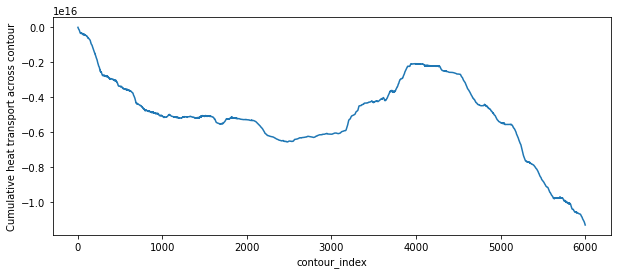

In [42]:
fig, ax = plt.subplots(figsize = (10,4))
heat_trans_across_contour.cumsum('contour_index').plot()
ax.set_ylabel('Cumulative heat transport across contour')


### Now repeat for control simulation

In [43]:
%%time

expt = control
session = master_session

# Load advective heat fluxes of correct time, location, and vertically integrate
temp_xflux_adv = cc.querying.getvar(expt, 'temp_xflux_adv',session, ncfile = 'ocean.nc', frequency = '1 monthly', start_time = start_time , end_time = end_time)
temp_xflux_adv = temp_xflux_adv.sel(time = time_slice, yt_ocean = lat_range).sum('st_ocean')
temp_yflux_adv = cc.querying.getvar(expt, 'temp_yflux_adv',session, ncfile = 'ocean.nc', frequency = '1 monthly',start_time = start_time, end_time = end_time)
temp_yflux_adv = temp_yflux_adv.sel(time = time_slice, yu_ocean = lat_range).sum('st_ocean')

# Load mass transports of correct time, location, and vertically integrate
tx_trans = cc.querying.getvar(expt, 'tx_trans',session, ncfile = 'ocean.nc', frequency = '1 monthly', start_time = start_time , end_time = end_time)
tx_trans = tx_trans.sel(time = time_slice, yt_ocean = lat_range).sum('st_ocean')
ty_trans = cc.querying.getvar(expt, 'ty_trans',session, ncfile = 'ocean.nc', frequency = '1 monthly', start_time = start_time , end_time = end_time)
ty_trans = ty_trans.sel(time = time_slice, yu_ocean = lat_range).sum('st_ocean')

## reassign and rename to incorporate reference temperature
temp_yflux_adv= temp_yflux_adv - T_0*cp*ty_trans
temp_xflux_adv= temp_xflux_adv - T_0*cp*tx_trans

temp_yflux_adv = temp_yflux_adv.rename({'yu_ocean':'y_ocean', 'xt_ocean':'x_ocean'})
temp_xflux_adv = temp_xflux_adv.rename({'yt_ocean':'y_ocean', 'xu_ocean':'x_ocean'})

# weighed time mean by month length
month_length = temp_yflux_adv.time.dt.days_in_month
temp_yflux_adv = (temp_yflux_adv*month_length).sum('time')/365
temp_xflux_adv = (temp_xflux_adv*month_length).sum('time')/365

temp_yflux_adv = temp_yflux_adv.load()
temp_xflux_adv = temp_xflux_adv.load()


## We could also loop in time if we didn't want the time average. Initialise a data array and fill in data by looping in time.

# stack transports into 1d and drop any points not on contour:
x_transport_1d = temp_xflux_adv.stack(contour_index = ['y_ocean', 'x_ocean'])
x_transport_1d = x_transport_1d.where(mask_x_numbered_1d>0, drop = True)
y_transport_1d = temp_yflux_adv.stack(contour_index = ['y_ocean', 'x_ocean'])
y_transport_1d = y_transport_1d.where(mask_y_numbered_1d>0, drop = True)

# combine all points on contour:
heat_trans_across_contour_control = xr.concat((x_transport_1d, y_transport_1d), dim = 'contour_index')
heat_trans_across_contour_control = heat_trans_across_contour_control.sortby(contour_ordering)
heat_trans_across_contour_control.coords['contour_index'] = contour_index_array
heat_trans_across_contour_control = heat_trans_across_contour_control.load()

CPU times: user 3min, sys: 10.5 s, total: 3min 11s
Wall time: 5min 17s


Text(0, 0.5, 'Anomaly in cumulative heat transport across contour')

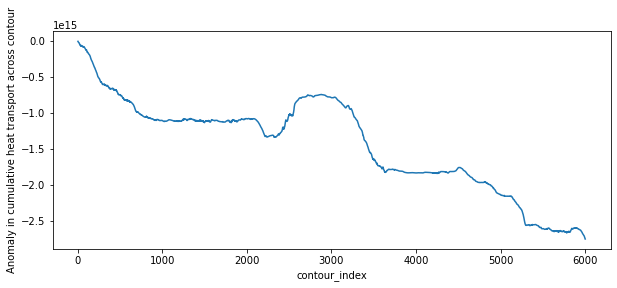

In [44]:
fig, ax = plt.subplots(figsize = (10,4))
(heat_trans_across_contour - heat_trans_across_contour_control).cumsum('contour_index').plot()
ax.set_ylabel('Anomaly in cumulative heat transport across contour')


### Make plot in lon coords rather than contour_index:

In [45]:
contour_ordering = xr.concat((mask_x_numbered_1d,mask_y_numbered_1d), dim = 'contour_index')
contour_ordering = contour_ordering.sortby(contour_ordering)
contour_index_array = np.arange(1,len(contour_ordering)+1)

# get lat and lon along contour, useful for plotting later:
lat_along_contour = contour_ordering.y_ocean
lon_along_contour = contour_ordering.x_ocean
# don't need the multi-index anymore, replace with contour count
lat_along_contour.coords['contour_index'] = contour_index_array
lon_along_contour.coords['contour_index'] = contour_index_array


In [46]:
distance_along_contour = xr.open_dataset('/g/data/x77/cy8964/Post_Process/access-om2/1000m_isobath_contour_distance.nc').distance_along_contour

distance_indices = np.zeros(8)
for i in np.arange(100,len(lon_along_contour.values)):
    if (distance_indices[1]==0):
        if (lon_along_contour.values[i]>-240):
            distance_indices[1] = lon_along_contour.contour_index.values[i]
    if (distance_indices[2]==0):
        if (lon_along_contour.values[i]>-180):
            distance_indices[2] = lon_along_contour.contour_index.values[i]
    if (distance_indices[3]==0):
        if (lon_along_contour.values[i]>-120):
            distance_indices[3] = lon_along_contour.contour_index.values[i]
    if (distance_indices[4]==0):
        if lon_along_contour.values[i]>-60:
            distance_indices[4] = lon_along_contour.contour_index.values[i]
    if (distance_indices[5]==0):
        if (lon_along_contour.values[i]>0):
            distance_indices[5] = lon_along_contour.contour_index.values[i]
    if (distance_indices[6]==0):
        if (lon_along_contour.values[i]>60):
            distance_indices[6] = lon_along_contour.contour_index.values[i]
distance_indices[7] = len(lon_along_contour.contour_index.values)-1


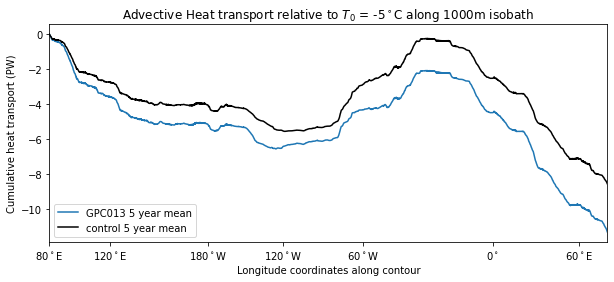

In [52]:
fig, axes = plt.subplots(figsize = (10,4))

axes.plot(distance_along_contour,(10**(-15)*heat_trans_across_contour.cumsum('contour_index')),label = 'GPC013 5 year mean')
axes.plot(distance_along_contour,(10**(-15)*heat_trans_across_contour_control.cumsum('contour_index')),label = 'control 5 year mean',color = 'k')

axes.set_ylabel('Cumulative heat transport (PW)')
axes.set_xticks(distance_along_contour[distance_indices.astype(int)[:-1]])
axes.set_xticklabels(('80$^\circ$E','120$^\circ$E','180$^\circ$W','120$^\circ$W','60$^\circ$W','0$^\circ$','60$^\circ$E'));
axes.set_xlim(0,distance_along_contour[-1]);
axes.set_xlabel('Longitude coordinates along contour')
axes.set_title('Advective Heat transport relative to $T_0$ = -5$^\circ$C along 1000m isobath')
plt.legend()


Cross-contour heat transport more southward in perturbation??


#### old with T_0 = - 2$^\circ$
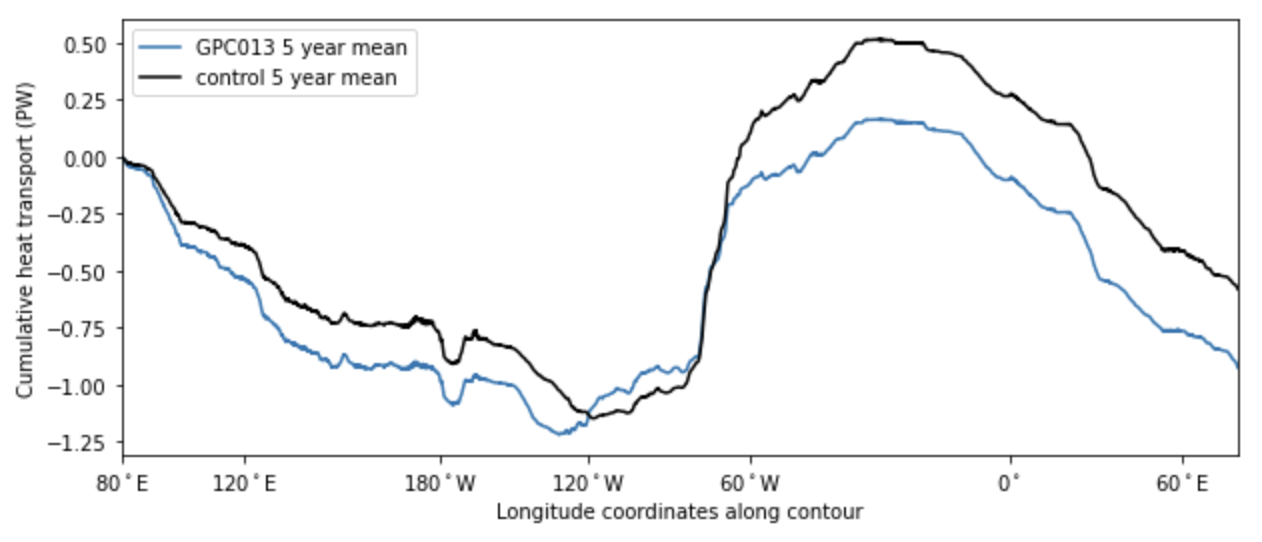



Do we get colder than -2$^\circ$C? Yes. So re-running with T_0 = -5$^\circ$C.

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/dask/array/reductions.py:611: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/dask/array/reductions.py:611: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/dask/array/reductions.py:611: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/dask/array/reductions.py:611: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


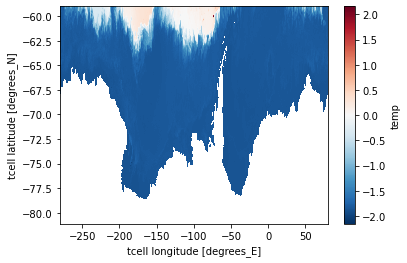

In [49]:
# Load temp monthly data (really we want daily/instantaneous but that'll take a while)
temp = cc.querying.getvar(expt, 'temp',session, ncfile = 'ocean.nc', frequency = '1 monthly', start_time = start_time , end_time = end_time)
temp = temp.sel(time = time_slice, yt_ocean = lat_range)

min_temp = temp.min(['st_ocean','time'])
(min_temp-273.15).plot()


In [50]:
temp.min().values

array(271.0003, dtype=float32)